In [ ]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def cramers_v(x1, x2):
  """
  Calculate cramer-v association stat for categorical variables
  """
  # Create the contingency table
  confusion_matrix = pd.crosstab(x1, x2)

  # Calculate Chi-squared statistic
  # chi2, p, dof, expected
  chi2 = chi2_contingency(confusion_matrix)[0]

  # Number of observations
  n = confusion_matrix.sum().sum()

  # Number of rows and columns
  r, k = confusion_matrix.shape

  # Calculate Cramér's V
  # We use the bias-corrected version
  phi2 = chi2 / n
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)

  if min((kcorr-1), (rcorr-1)) == 0:
      return 0.0
  else:
      v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
      return v

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/INDEND242A/INDENG242A_Final_Project/mushrooms.csv")

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## Overall Dataframe


*   "class" is roughly balanced
*   Only categorical variables
*   **veil-type has only 1 value p --> drop**





In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
X = df.drop(columns = ["class", "veil-type"])
Y = df[["class"]]

num_feat = len(X.columns)

categorical_cols = X.columns.to_list()

## Cramer V Association





### Check association between variables
*   gill-attachment has high association values with
    * stock-color-above-ring: 0.98
    * stock-color-below-ring: 0.98
    * veil-color: 0.95
    *   But we can also compare these features's association to target "class"
        * gill-attachment: 0.13
        * stock-color-above-ring: 0.52
        * stock-color-below-ring: 0.51
        * veil-color: 0.15
    * **TODO: maybe**: drop gill-attachment sinc it has low predictive power and high association with 3 other features








In [ ]:
X.head(1)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u


In [ ]:
# Initialize an empty DataFrame to store the results
assoc_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

# Iterate over all unique pairs of columns
for i in range(num_feat):
    for j in range(num_feat):
        # Get column names
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]

        # Calculate Cramér's V
        assoc = cramers_v(df[col1], df[col2])

        # Store the result in the matrix
        assoc_matrix.loc[col1, col2] = assoc

assoc_matrix = assoc_matrix.round(2)

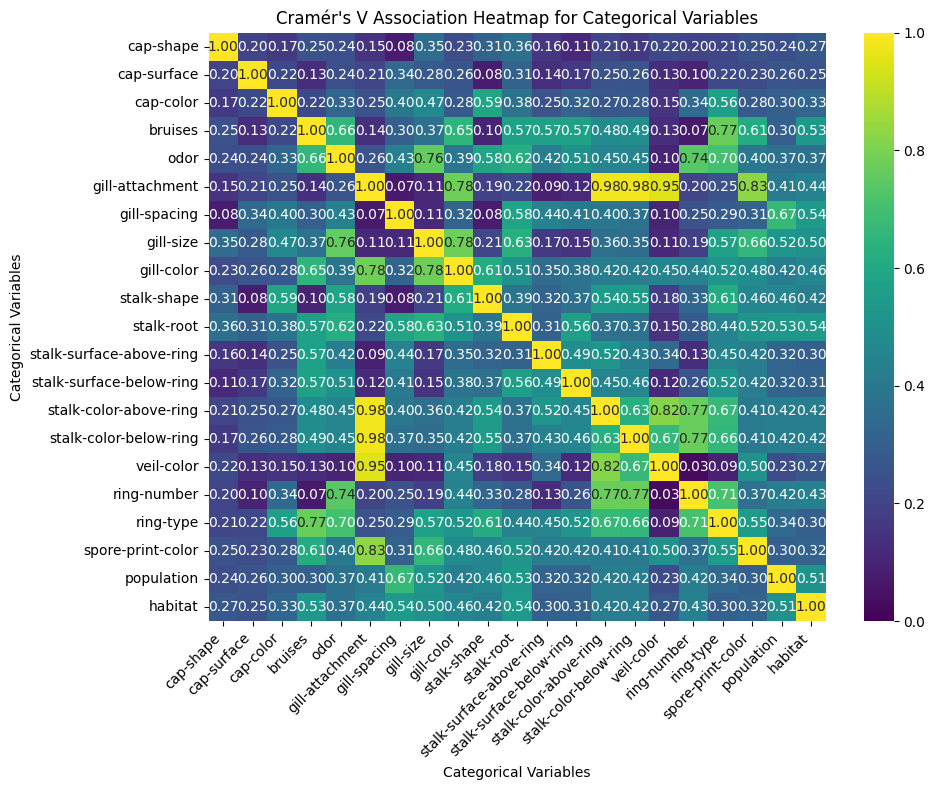

In [ ]:
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(
    assoc_matrix,
    annot=True,      # Show the association values on the heatmap
    fmt='.2f',       # Format the annotations to two decimal places
    cmap='viridis',  # Choose a color map (e.g., 'viridis', 'magma', 'Blues')
    vmin=0,          # Set the minimum value for the color bar (Cramér's V is 0-1)
    vmax=1           # Set the maximum value for the color bar
)
plt.title("Cramér's V Association Heatmap for Categorical Variables")
plt.xlabel("Categorical Variables")
plt.ylabel("Categorical Variables")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0)             # Keep y-axis labels horizontal
plt.tight_layout()                 # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

### Check association with "class"

In [ ]:
# Initialize an empty DataFrame to store the results
assoc_matrix = pd.DataFrame(index=categorical_cols, columns=["class"], dtype=float)

col1 = "class"

# Iterate over all unique pairs of columns
for i in range(num_feat):
      # Get column names
      col2 = categorical_cols[i]

      # Calculate Cramér's V
      assoc = cramers_v(df[col1], df[col2])

      # Store the result in the matrix
      assoc_matrix.loc[col2] = assoc

assoc_matrix = assoc_matrix.round(2)

In [ ]:
assoc_matrix.T

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,0.24,0.2,0.22,0.5,0.97,0.13,0.35,0.54,0.68,0.1,0.41,0.59,0.57,0.52,0.51,0.15,0.21,0.6,0.75,0.49,0.44


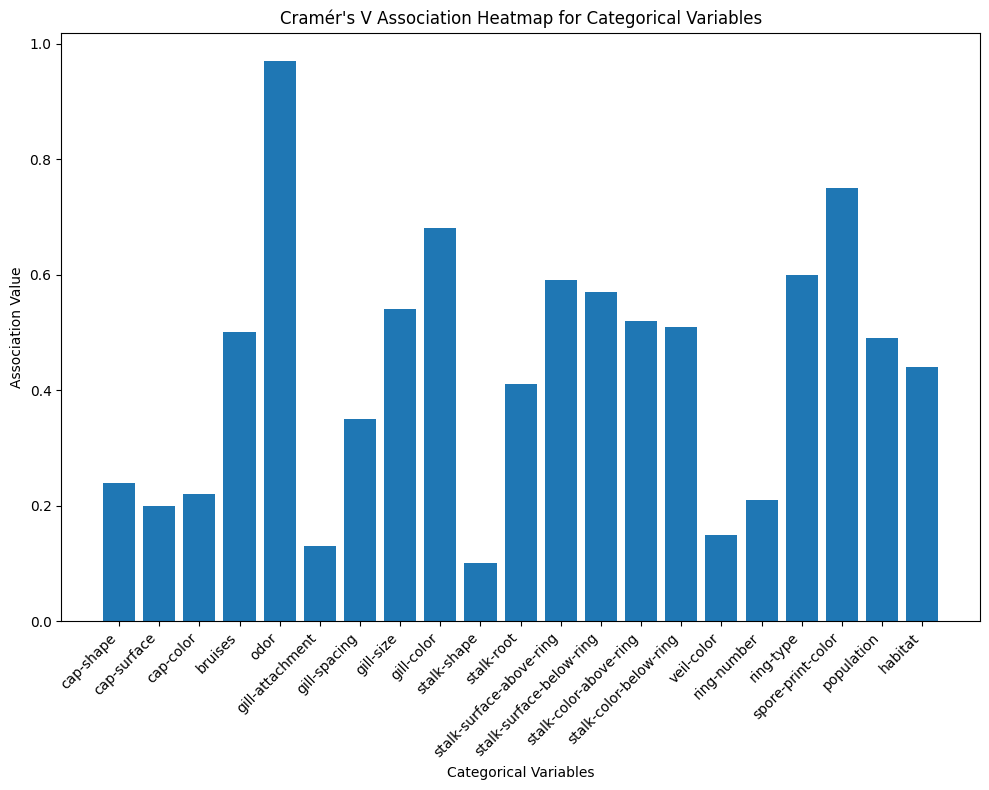

In [ ]:
plt.figure(figsize=(10, 8)) # Adjust figure size as needed

plt.bar(categorical_cols, assoc_matrix["class"])

plt.title("Cramér's V Association Heatmap for Categorical Variables")
plt.xlabel("Categorical Variables")
plt.ylabel("Association Value")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0)             # Keep y-axis labels horizontal
plt.tight_layout()                 # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

### Variables related to Color
*   gill-color, veil-color, stalk-color-above-ring, stalk-color-below-ring
*   Association between stalk-color-above-ring and below-ring are not high enough to be a concern, and they have similar predictive power on Class
*   However, veil-color has high association value between gill-attachment and stock-color, and relatively low predive power. **TODO: maybe consider dropping**

